In [1]:
import xml.etree.ElementTree as etree
import matplotlib.pyplot as plt
DATA = etree.XML(open("./dataset.xml","r").read())
def buildDataFrame(data):
    lista = []
    for record in DATA:
        r = {}
        for field in record:
            r[field.tag]=field.text
        lista.append(r)
    return lista
df = buildDataFrame(DATA)


In [2]:

class Practica10:
    def __init__(self) -> None:
        self.cont = 0
    def toPairs(self,dic):
        return [(x,y) for x,y in dic.items()]

    def passwordEqAndCont(self,listOfRecord):
        dicPasswords = {}
        cont = 0
        for record in listOfRecord:
            self.cont+=1
            password = record["password"]
            if password in dicPasswords:
                dicPasswords[password]+=1
                cont+=1
                continue
            dicPasswords[password]=1

        return cont, self.toPairs(dicPasswords)

    def getMaxRepeatPassword(self,listOfRecords):
        dicCont = {}
        num = -1
        p = None
        for record in listOfRecords:
            self.cont+=1
            password = record["password"]
            if password in dicCont:
                dicCont[password]+=1
                continue
            dicCont[password]=1
        for password,cont in dicCont.items():
            self.cont+=1
            if num < cont:
                num = cont
                p = password

        return num,p

    def getEnterprise(self,email):
        toStart = email.find("@")+1
        return email[toStart:email.find(".",toStart)]

    def numOfEnterprise(self,listRecords):
        enterprises = set()
        for record in listRecords:
            self.cont+=1
            email = record["email"]
            enterprise = self.getEnterprise(email)
            enterprises.add(enterprise)
        return enterprises.__len__()

    def numAndEmailEq(self,listOfRecords):
        dicEmail = {}
        cont = 0
        for record in listOfRecords:
            self.cont+=1
            email = record["email"]
            if email in dicEmail:
                cont+=1
                continue
            dicEmail[email]=1
        return cont, self.toPairs(dicEmail)
def plots(listPair,f=False):
    if f:
        return [x for (x,y) in listPair],[y for (x,y) in listPair]
    labels = ["" for _ in listPair]
    return labels,[y for (x,y) in listPair]

# Gráficas de complejidad temporal.
### <code>passwordEqAndCont()</code>
#### Peor,mejor y caso promedio.
La complejidad del algoritmo es lineal dada que tenemos que iterar sobre todos los registros de la lista.
$$\mathcal{O}(n)$$

Text(0, 0.5, 'Operaciones')

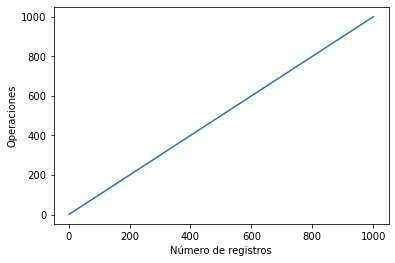

In [19]:
i = 0
X = []
Y = []
obj = Practica10()
while i < len(df):
    i+=1
    test = df[:i]
    obj.passwordEqAndCont(test)
    X.append(i)
    Y.append(obj.cont)
    obj.cont = 0
plt.plot(X,Y)
plt.xlabel("Número de registros")
plt.ylabel("Operaciones")


### <code>getMaxRepeatPassword()</code>
#### Peor,mejor y caso promedio.
Para obtener el máximo de incidencias el algoritmo debe revisar registro por registro el valor numérico de repeticiones y determinar cual es el mayor.
$$\mathcal{O}(n)$$

Text(0, 0.5, 'Operaciones')

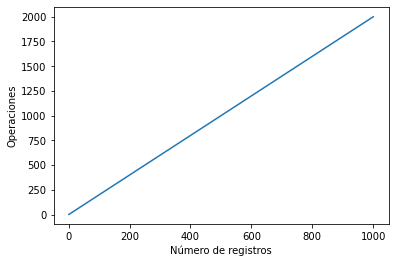

In [20]:
i = 0
X = []
Y = []
obj = Practica10()
while i < len(df):
    i+=1
    test = df[:i]
    obj.getMaxRepeatPassword(test)
    X.append(i)
    Y.append(obj.cont)
    obj.cont = 0
plt.plot(X,Y)
plt.xlabel("Número de registros")
plt.ylabel("Operaciones")

### <code>numOfEnterprise()</code>
#### Peor,mejor y caso promedio.
Para determinar el numero de empresas en nuestro _dataset_ la implementación recupera una parte del correo de cada registro por lo que tiene que iterar sobre toda la información y contar el numero de empresas diferentes.
$$\mathcal{O}(n)$$

Text(0, 0.5, 'Operaciones')

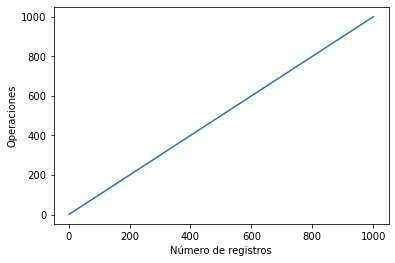

In [18]:
i = 0
X = []
Y = []
obj = Practica10()
while i < len(df):
    i+=1
    test = df[:i]
    obj.numOfEnterprise(test)
    X.append(i)
    Y.append(obj.cont)
    obj.cont = 0
plt.plot(X,Y)
plt.xlabel("Número de registros")
plt.ylabel("Operaciones")

### <code>numAndEmailEq()</code>
#### Peor,mejor y caso promedio.
Para determinar el numero de correos iguales y la lista de pares entre _email_ y la cantidad de repeticiones de este se itera sobre todo el _dataset_ para ir contado y generando esta lista.
$$\mathcal{O}(n)$$

Text(0, 0.5, 'Operaciones')

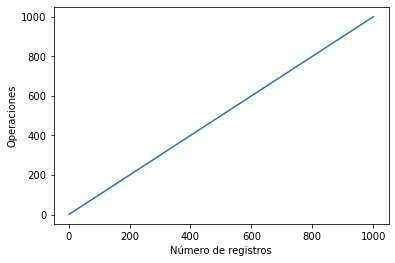

In [23]:
i = 0
X = []
Y = []
obj = Practica10()
while i < len(df):
    i+=1
    test = df[:i]
    obj.numAndEmailEq(test)
    X.append(i)
    Y.append(obj.cont)
    obj.cont = 0
plt.plot(X,Y)
plt.xlabel("Número de registros")
plt.ylabel("Operaciones")

# Gráficas de _pie_

### <code>passwordEqAndCont()</code>

Text(0.5, 1.0, 'Contraseñas vs Repeticiones')

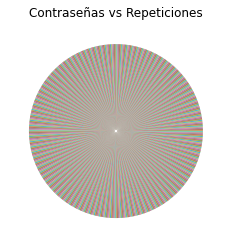

In [24]:
p = Practica10()
cont,pairs = p.passwordEqAndCont(df)
labels,x = plots(pairs)
plt.pie(x,labels=labels)
plt.title("Contraseñas vs Repeticiones")

### <code>getMaxRepeatPassword()</code>

Text(0.5, 1.0, 'Contraseñas mas repetida')

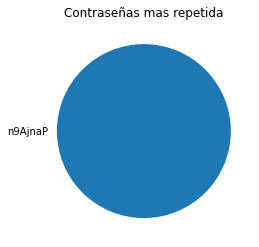

In [25]:
p = Practica10()
cont,password = p.getMaxRepeatPassword(df)
plt.pie([cont],labels=[password])
plt.title("Contraseñas mas repetida")

### <code>numOfEnterprise()</code>

Text(0.5, 1.0, 'Numero de empresas')

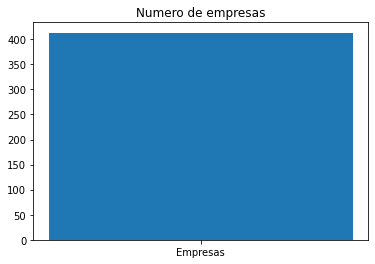

In [27]:
p = Practica10()
cont = p.numOfEnterprise(df)
plt.bar("Empresas",cont)
plt.title("Numero de empresas")

### <code>numAndEmailEq()</code>

Text(0.5, 1.0, 'Emails vs Repeticiones')

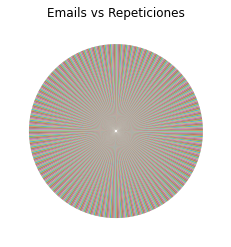

In [28]:
p = Practica10()
cont,pairs = p.passwordEqAndCont(df)
labels,x = plots(pairs)
plt.pie(x,labels=labels)
plt.title("Emails vs Repeticiones")

**Nota:** Dado que en este _dataset_ ninguna contraseña se repite entonces todas tienen un valor de repetición igual 1.Decidí pintar la gráfica con _labels_ en blanco para que no se sature el gráfico.

# Gráfica de _barras_
### <code>passwordEqAndCont()</code>

Text(0.5, 1.0, 'Contraseñas repetidas')

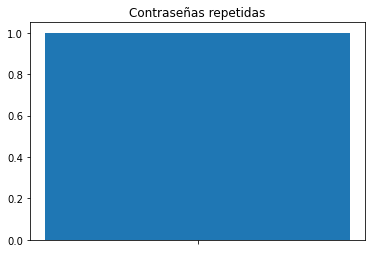

In [29]:
p = Practica10()
cont,pairs = p.passwordEqAndCont(df)
labels,x = plots(pairs)
plt.bar(labels,x)
plt.title("Contraseñas repetidas")

**Nota:** Se están pintando 1000 aristas pero como todas tienen un altura de 1, es decir, solo se repiten una vez parece un solo bloque pero en realidad son 1000 barras. En este caso también decidí eliminar las labels

### <code>getMaxRepeatPassword()</code>

Text(0.5, 1.0, 'Contraseña mas repetida')

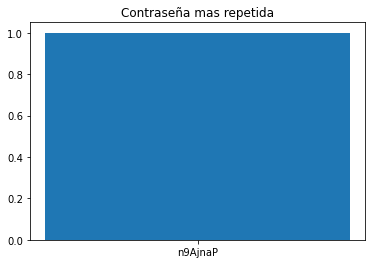

In [30]:
p = Practica10()
cont,password = p.getMaxRepeatPassword(df)
plt.bar(password,cont)
plt.title("Contraseña mas repetida")

### <code>numOfEnterprise()</code>

Text(0.5, 1.0, 'Numero de empresas')

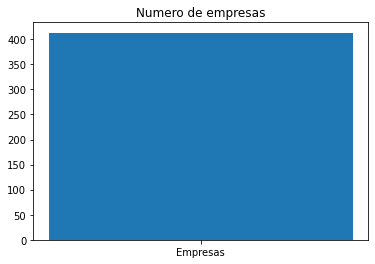

In [32]:
p = Practica10()
cont = p.numOfEnterprise(df)
plt.bar("Empresas",cont)
plt.title("Numero de empresas")

### <code>numAndEmailEq()</code>

Text(0.5, 1.0, 'Numero de correos repetidos')

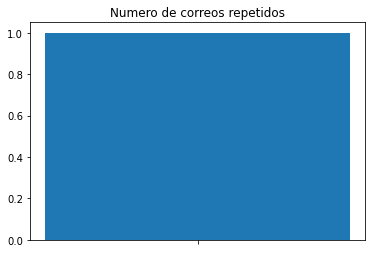

In [33]:
p = Practica10()
cont,pairs = p.numAndEmailEq(df)
labels,x = plots(pairs)
plt.bar(labels,x)
plt.title("Numero de correos repetidos")